This notebook is a personal project where I have written code to generate "glitch art" from an input image. I have written a function, pix_sort(), which can perform various different types pixel sorting algorithms, either by row or by column. Some examples are given below.

In [19]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import copy
import scipy.misc

[aircraft image source](https://commons.wikimedia.org/wiki/File:US_Navy_070518-N-2659P-249_Airman_Apprentice_Zach_Bray_from_air_department%27s_launch_and_recovery_division_hurries_to_ensure_the_tailhook_releases_the_arresting_gear_wire_after_the_recovery_of_an_F-A-18C_Hornet.jpg)

[selfie image source](https://commons.wikimedia.org/wiki/File:Self-portrait_in_a_Straw_Hat_by_Elisabeth-Louise_Vig%C3%A9e-Lebrun.jpg)

To save images:
`scipy.misc.imsave('filename.jpg', array)`

In [24]:
img = mpimg.imread("img/hornet640.jpg")
img2 = mpimg.imread("img/selfie345.jpg")
# only need this next line to manipulate directly
# img.setflags(write=1)

def cmp_B(arr1, arr2):
    if(arr1[2] > arr2[2]):
        return 1
    elif(arr1[0] == arr2[2]):
        return 0
    else:
        return -1

def pix_sort(image, style, dim="row", copied=False):
    if(not copied):
        new_img = copy.deepcopy(image)
    else:
        new_img = image
    if(dim is not "col"):
        if(style==1):
            for i in range(0,len(new_img)):
                new_img[i] = np.sort(new_img[i], 0)
        elif(style==2):
            for i in range(0,len(new_img)):
                new_img[i] = sorted(new_img[i], cmp=cmp_B)
        # begins sort only if it finds a dark spot
        elif(style==3):
            sorting = False
            for i in range(0,len(new_img)):
                sorting = False
                for j in range(0,len(new_img[0])):
                    if(new_img[i,j][0] < 20 and new_img[i,j][1] < 20 and new_img[i,j][2] < 20):
                        sorting = True
                    if(sorting == True):
                        new_img[i] = np.append(new_img[i][0:j], np.sort(new_img[i][j:], 0), axis=0)
                        break
        # begins sort only if it finds a light spot
        elif(style==4):
            sorting = False
            for i in range(0,len(new_img)):
                sorting = False
                for j in range(0,len(new_img[0])):
                    if(new_img[i,j][0] > 210 and new_img[i,j][1] > 210 and new_img[i,j][2] > 210):
                        sorting = True
                    if(sorting == True):
                        new_img[i] = np.append(new_img[i][0:j], np.sort(new_img[i][j:], 0), axis=0)
                        break
    else:
        new_img = np.rot90(new_img)
        new_img = pix_sort(new_img,style,"row", True)
        new_img = np.rot90(new_img,3)
    return new_img

In [28]:
def intensity_sum(arr1, arr2):
    if(np.sum(arr1) > np.sum(arr2)):
        return 1
    elif(np.sum(arr1) == np.sum(arr2)):
        return 0
    else:
        return -1
    
def cmp_R(arr1, arr2):
    if(arr1[0] > arr2[0]):
        return 1
    elif(arr1[0] == arr2[0]):
        return 0
    else:
        return -1

def cmp_G(arr1, arr2):
    if(arr1[1] > arr2[1]):
        return 1
    elif(arr1[1] == arr2[1]):
        return 0
    else:
        return -1   

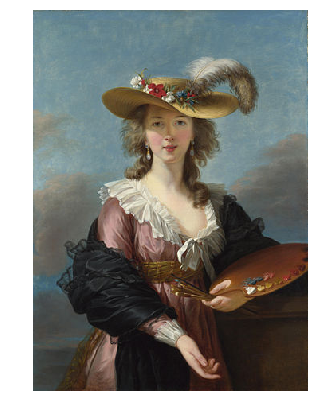

In [29]:
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(img2)
plt.show()

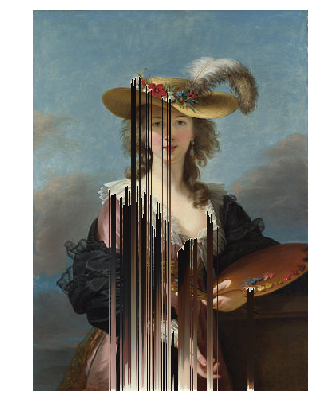

In [30]:
new_img2 = pix_sort(img2, 4, dim="col")

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(new_img2)
plt.show()

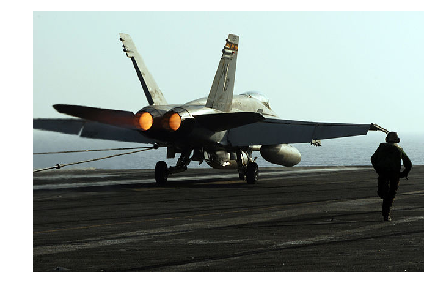

In [31]:
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(img)
plt.show()

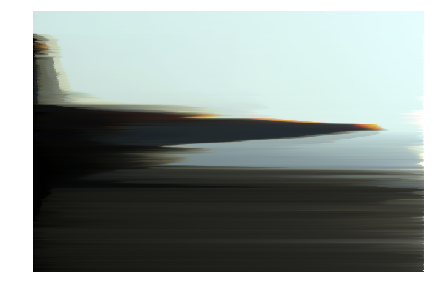

In [32]:
plt.figure(figsize=(7,7))
plt.axis('off')
new_img = pix_sort(img, 1)
plt.imshow(new_img)
plt.show()